# score_from_smi

In [ ]:
PROJECT_DIRECTORY = '/home/kastan/ncsa/mmli/ACERetro'
sfscore_path = PROJECT_DIRECTORY+'/sfscore' # replace PROJECT_DIRECTORY
import sys
sys.path.append(str(sfscore_path))

from sfscore import SFScore
sfscore_model = SFScore()

# load the model in 'process_reaction_database/saved_model/ecfp4_4096_3_layer_epoch10.pt' by default
sfscore_model.load() 
smiles = 'O=C(COP(=O)(O)O)[C@H](O)[C@H](O)CO'
sfscore = sfscore_model.score_from_smi(smiles)
print('SMILES:',smiles,', SFScore:',sfscore)
# SMILES: O=C(COP(=O)(O)O)[C@H](O)[C@H](O)CO , SFScore: [0.4322359 0.6146086]

# get_chemoenzy_path_async

In [1]:
# ./pathway_search_standalone/
import sys
import joblib
import six
sys.modules['sklearn.externals.joblib'] = joblib
sys.modules['sklearn.externals.six'] = six


from pathway_search_standalone.scripts.search_utils import hybridSearch
hybridSearch = hybridSearch()
smiles = 'CC[C@@H](CO)NCCN[C@@H](CC)CO' # Target molecule's SMILES
# Conduct a 3 min asynchronous chemoenzymatic synthesis planning
explored_rxns, explored_nodes, start_node = hybridSearch.get_chemoenzy_path_async(smiles, max_depth=10, chem_topk=10, max_num_templates=250, max_branching=15, time_lim=180)

project_directory:  /home/kastan/ncsa/mmli/ACERetro
INFO@pricer              : [1718726777.924s]	Loaded prices from flat file
INFO@retro_transformer   : [1718726777.926s]	Loading template prioritizer for RetroTransformer
INFO@retro_transformer   : [1718726778.212s]	Loading precursor prioritizer for RetroTransformer
INFO@pricer              : [1718726779.227s]	Cannot connect to mongodb to load prices
INFO@pricer              : [1718726779.550s]	Loaded prices from flat file
INFO@retro_transformer   : [1718726779.586s]	Loading fast filter for RetroTransformer
INFO@fast_filter         : [1718726779.587s]	Starting to load fast filter
INFO@fast_filter         : [1718726780.297s]	Done loading fast filter
INFO@retro_transformer   : [1718726780.298s]	Using default clustering for RetroTransformer
INFO@retro_transformer   : [1718726780.298s]	Loading retro-synthetic transformer
INFO@retro_transformer   : [1718726780.299s]	reading from file
INFO@template_transformer: [1718726780.299s]	Loading templ

# build_graph_from_async

In [6]:
# ./pathway_search_standalone/
from scripts.search_utils import build_graph_from_async
import networkx as nx
graph_json = build_graph_from_async(explored_rxns,explored_nodes,start_node)
g = nx.node_link_graph(graph_json) # reaction graph
g

for gg in g.nodes():
    print(gg)
    print(g.nodes[gg])

CC[C@@H](CO)NCCN[C@@H](CC)CO
{'type': 'chemical', 'score': 112.76640682967036, 'sfscore': [0.5027291774749756, 0.5171467661857605], 'chem_score': 56.07544387738171, 'enzy_score': 54.44962420331848, 'depth': -1, 'terminal': False}
CC[C@@H](C=O)NCCN[C@@H](CC)CO>>CC[C@@H](CO)NCCN[C@@H](CC)CO
{'smiles': 'CC[C@@H](C=O)NCCN[C@@H](CC)CO', 'smiles_split': ['CC[C@@H](C=O)NCCN[C@@H](CC)CO'], 'mapped_smiles': '[CH3:1][CH2:2][C@@H:3]([CH2:4][OH:5])[NH:6][CH2:7][CH2:8][NH:9][C@@H:10]([CH2:11][CH3:12])[CH:13]=[O:14]', 'reacting_atoms': (13, 14), 'template_id': 'e85dde51e44b75a7c242f65b07224737', 'template_set': ['bkms'], 'num_examples': 42, 'necessary_reagent': '', 'template_score': 0.3359075, 'rms_molwt': -202.168127944, 'num_rings': 0, 'plausibility': 1, 'tforms': ['e85dde51e44b75a7c242f65b07224737'], 'rank': 1, 'score': -335.7067362349664, 'type': 'reaction', 'model': ['bkms'], 'depth': 0, 'precursor_smiles': 'CC[C@@H](C=O)NCCN[C@@H](CC)CO'}
CC[C@@H](CO)NCCN[C@H](C)CC>>CC[C@@H](CO)NCCN[C@@H](CC)C

# Plotting the Network

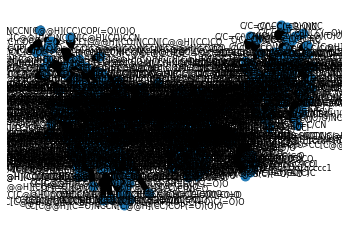

In [16]:
import matplotlib.pyplot as plt

# Assuming 'g' is your graph object
pos = nx.spring_layout(g)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(g, pos, node_size=80)  # Reduced node size

# edges
nx.draw_networkx_edges(g, pos, width=6)

# nx.draw_networkx_labels(g, pos, font_size=8, font_family="sans-serif")


plt.axis("off")  # Turn off the axis
plt.show()  # Display the graph

In [28]:
import networkx as nx
from pyvis.network import Network
import numpy as np

# Function to convert all float32 values in the graph to float
def convert_float32_to_float(graph):
    for node, node_attrs in graph.nodes(data=True):
        for key, value in node_attrs.items():
            if isinstance(value, np.float32):
                node_attrs[key] = float(value)
    for u, v, edge_attrs in graph.edges(data=True):
        for key, value in edge_attrs.items():
            if isinstance(value, np.float32):
                edge_attrs[key] = float(value)

# Assuming 'g' is your graph object
convert_float32_to_float(g)

# net = Network(notebook=True, cdn_resources='in_line')
# net.from_nx(g)
# net.show("graph.html")
net = Network(notebook=False)  # Set notebook to False for saving to file
net.from_nx(g)
net.show("graph.html")  # This will save the graph to a file named 'graph.html'

graph.html


AttributeError: 'NoneType' object has no attribute 'render'

KeyError: 'score'

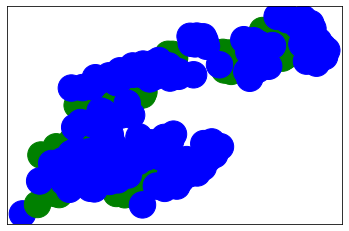

In [12]:
import matplotlib.pyplot as plt

pos = nx.spring_layout(g)  # positions for all nodes

# Draw nodes with different colors based on their 'type' attribute
node_color = ['blue' if g.nodes[node]['type'] == 'chemical' else 'green' for node in g.nodes]
nx.draw_networkx_nodes(g, pos, node_color=node_color, node_size=700)

# Draw edges and use a different style if 'score' is below a threshold
edge_style = ['dashed' if g.edges[edge]['score'] < -1000 else 'solid' for edge in g.edges]
nx.draw_networkx_edges(g, pos, style=edge_style, width=2)

# labels
nx.draw_networkx_labels(g, pos, font_size=12, font_family="sans-serif")

plt.axis("off")
plt.show()

In [13]:
for edge in g.edges:
    print(edge)
    print(g.edges[edge])

('CC[C@@H](C=O)NCCN[C@@H](CC)CO>>CC[C@@H](CO)NCCN[C@@H](CC)CO', 'CC[C@@H](CO)NCCN[C@@H](CC)CO')
{'width': 1}
('CC[C@@H](CO)NCCN[C@H](C)CC>>CC[C@@H](CO)NCCN[C@@H](CC)CO', 'CC[C@@H](CO)NCCN[C@@H](CC)CO')
{'width': 1}
('CC[C@@H](CO)NCCN[C@@H](CC)C(=O)O>>CC[C@@H](CO)NCCN[C@@H](CC)CO', 'CC[C@@H](CO)NCCN[C@@H](CC)CO')
{'width': 1}
('CC[C@@H](CO)NCCN[C@@H](CC)COP(=O)(O)O>>CC[C@@H](CO)NCCN[C@@H](CC)CO', 'CC[C@@H](CO)NCCN[C@@H](CC)CO')
{'width': 1}
('CC[C@@H](CO)NCCN[C@@H](CC)COC(C)=O>>CC[C@@H](CO)NCCN[C@@H](CC)CO', 'CC[C@@H](CO)NCCN[C@@H](CC)CO')
{'width': 1}
('CC[C@@H](CO)NCCN[C@@H](CC)CCl>>CC[C@@H](CO)NCCN[C@@H](CC)CO', 'CC[C@@H](CO)NCCN[C@@H](CC)CO')
{'width': 1}
('CC[C@@H](CO)NCCN[C@@H](CC)C(O)O>>CC[C@@H](CO)NCCN[C@@H](CC)CO', 'CC[C@@H](CO)NCCN[C@@H](CC)CO')
{'width': 1}
('CC[C@@H](CO)NCCN[C@@H](CC)CP(=O)(O)O>>CC[C@@H](CO)NCCN[C@@H](CC)CO', 'CC[C@@H](CO)NCCN[C@@H](CC)CO')
{'width': 1}
('CC[C@@H](CO)NCCN[C@@H](CC)CO[PH](=O)(=O)O>>CC[C@@H](CO)NCCN[C@@H](CC)CO', 'CC[C@@H](CO)NCCN[C@@H](CC)CO'